#Project 12 - Semi-Supervised Learning Classification - Wilfredo Aaron Sosa Ramos

#Google AI human-centered design approach (https://ai.google/responsibility/responsible-ai-practices/)

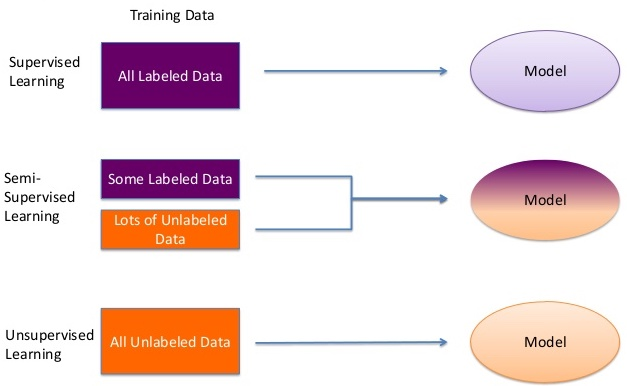

Source: https://es.slideshare.net/Dataiku/dataiku-hadoop-summit-semisupervised-learning-with-hadoop-for-understanding-user-web-behaviours

#Phase 1: Analysis

In [46]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [47]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 12/dataset/apple_quality.csv')

In [48]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [49]:
df.drop("A_id", axis=1, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [51]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Assumptions:
*   Continuity assumption (Points which are close to each other are more likely to share a label)
*   Cluster assumption (The data tend to form discrete clusters, and points in the same cluster are more likely to share a label)
*   Manifold assumption (The data lie approximately on a manifold of much lower dimension than the input space)






In [52]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [53]:
df.isna().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [54]:
df.tail(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [55]:
df.drop(df.tail(1).index, inplace=True)

#Phase 2: Transformation

In [56]:
df["Acidity"] = df["Acidity"].astype(float)

Visualize the data

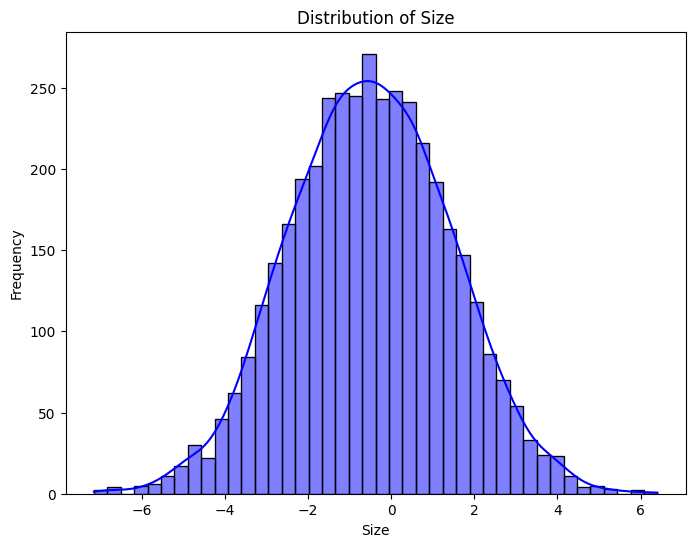

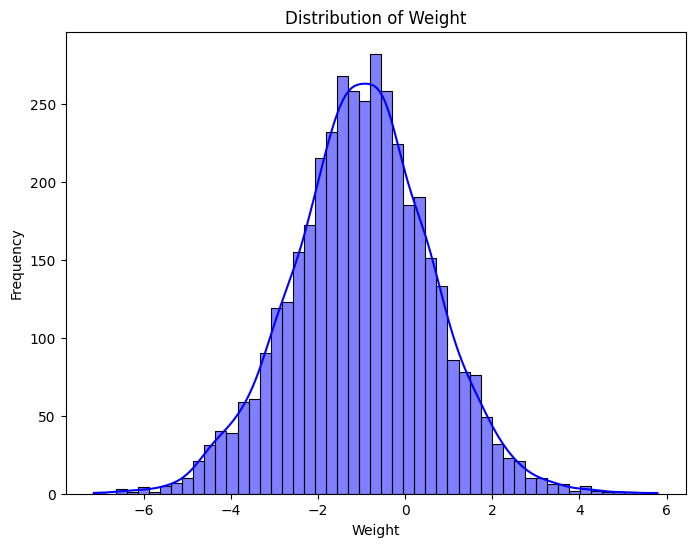

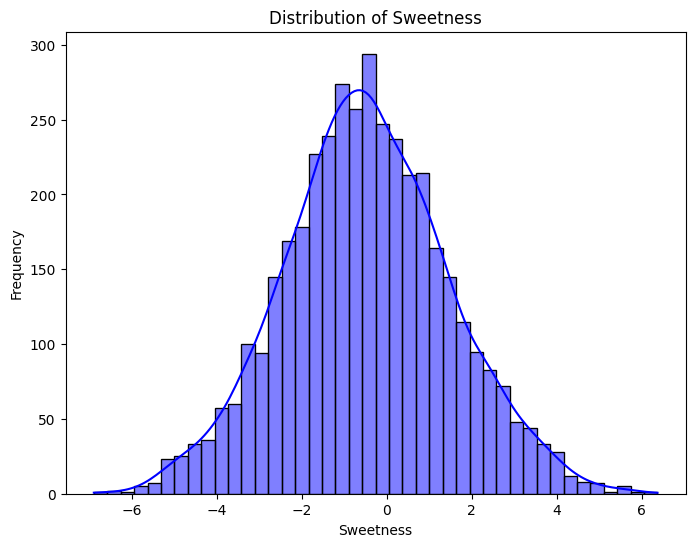

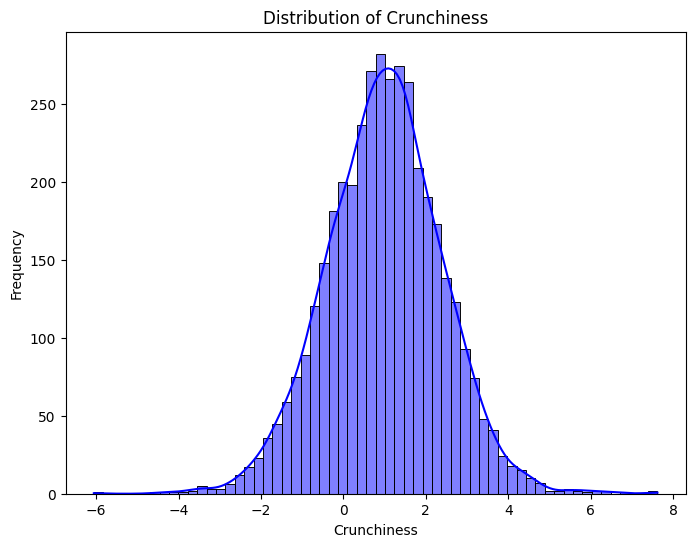

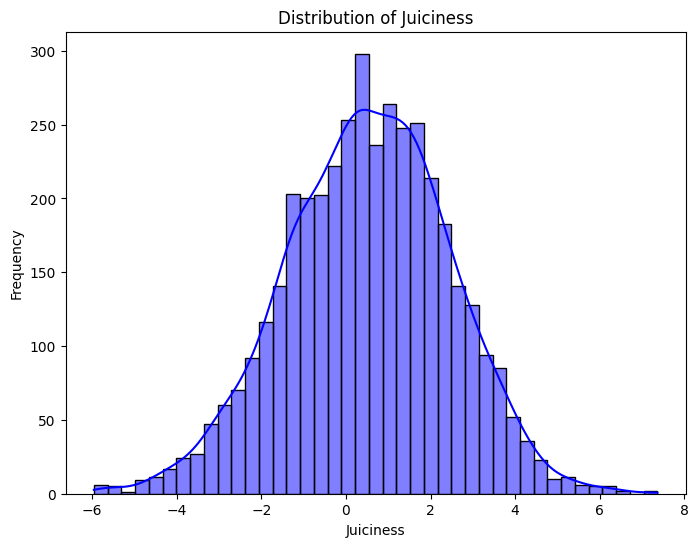

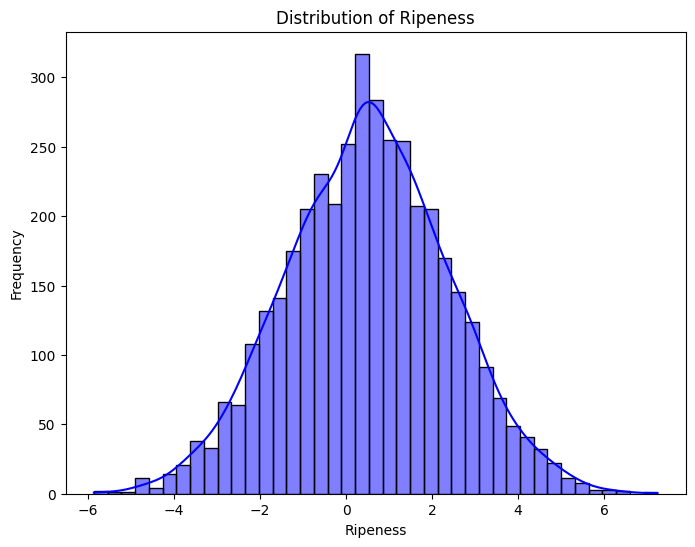

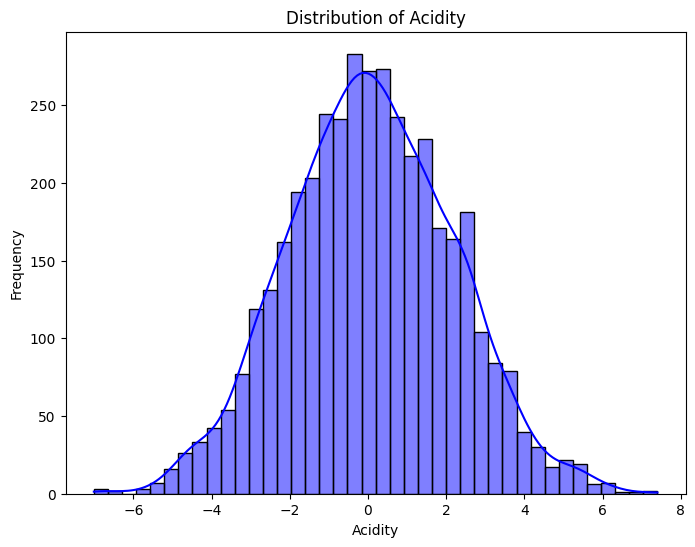

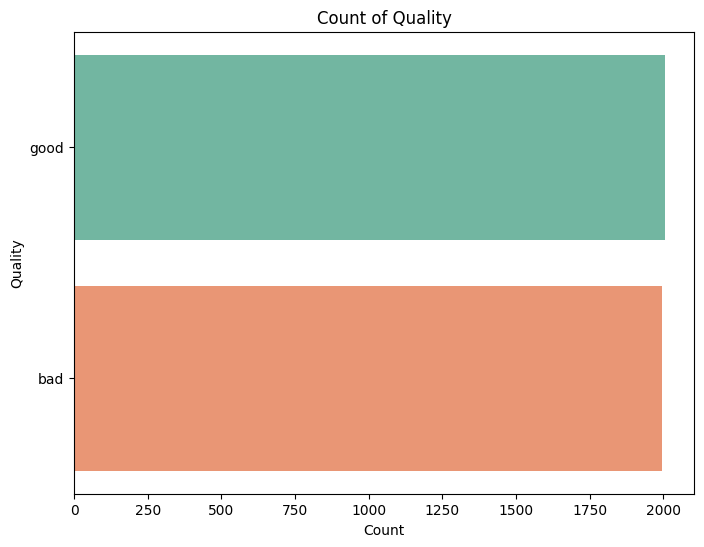

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [58]:
df_encoded = pd.get_dummies(df, columns=["Quality"])
print(df_encoded.head())

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

   Quality_bad  Quality_good  
0            0             1  
1            0             1  
2            1             0  
3            0             1  
4            0             1  


In [59]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Size          4000 non-null   float64
 1   Weight        4000 non-null   float64
 2   Sweetness     4000 non-null   float64
 3   Crunchiness   4000 non-null   float64
 4   Juiciness     4000 non-null   float64
 5   Ripeness      4000 non-null   float64
 6   Acidity       4000 non-null   float64
 7   Quality_bad   4000 non-null   uint8  
 8   Quality_good  4000 non-null   uint8  
dtypes: float64(7), uint8(2)
memory usage: 226.7 KB


#Phase 3: Load

Source: https://www.kaggle.com/code/altprof/basic-semi-supervised-learning-models

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import roc_auc_score

In [62]:
import warnings
warnings.simplefilter('ignore')
np.random.seed(1)

In [63]:
df_encoded = shuffle(df_encoded, random_state=1)
X = df_encoded.drop(["Quality_bad", "Quality_good"], axis=1)
y = df_encoded["Quality_good"]

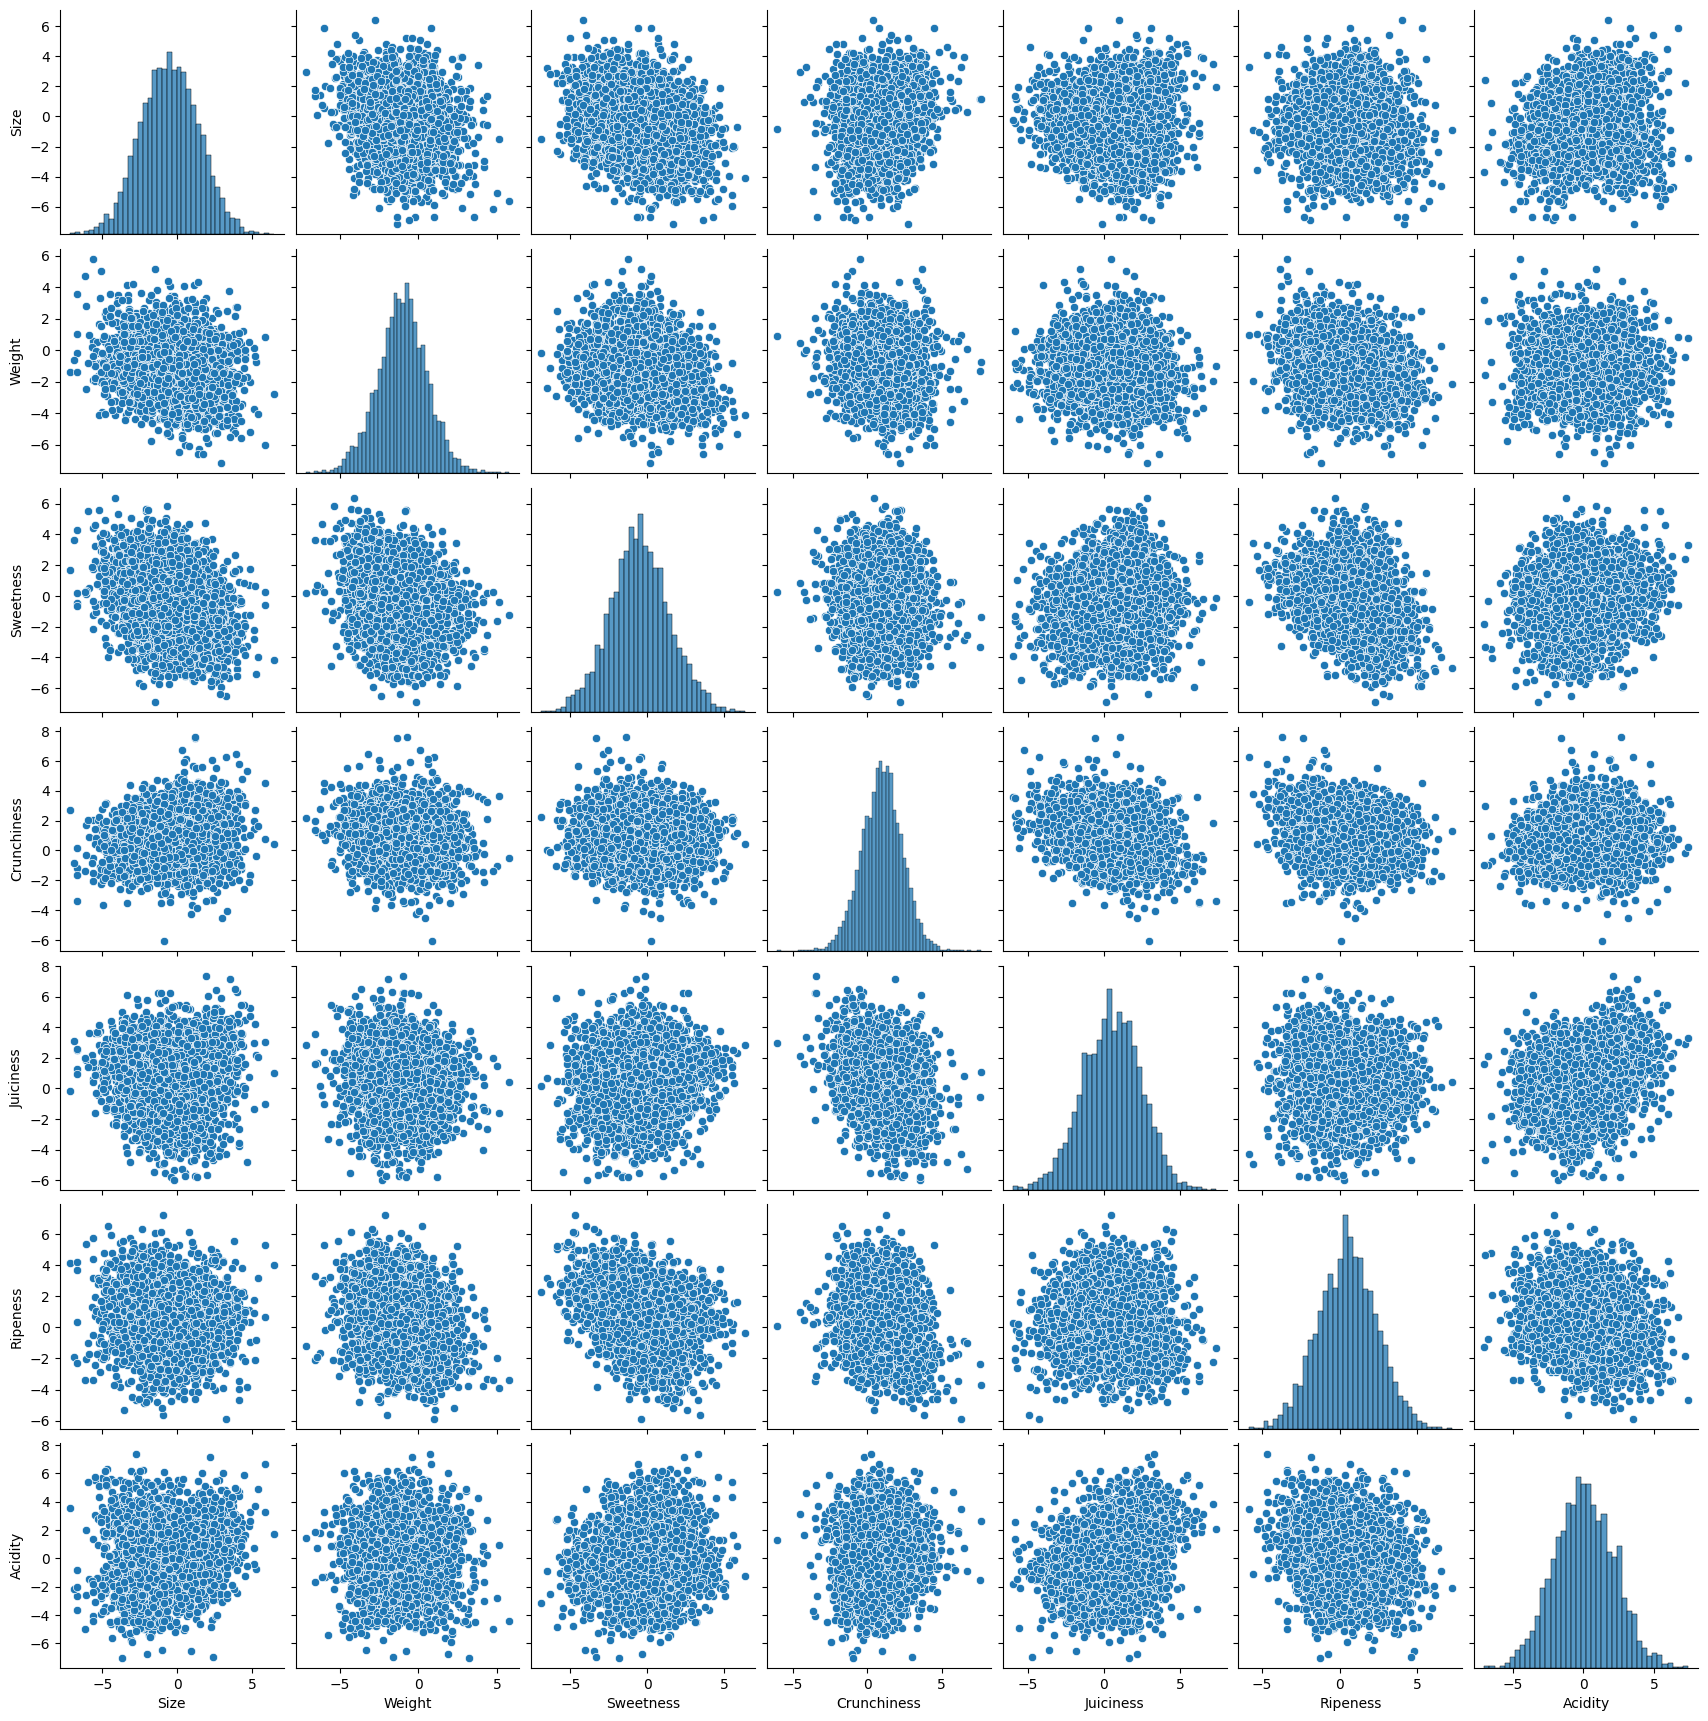

In [64]:
sns.pairplot(X)

In [65]:
X_1, X_2, X_3  = np.split(X, [int(.1*len(X)), int(.5*len(X))])
y_1, y_2, y_3  = np.split(y, [int(.1*len(y)), int(.5*len(y))])
y_1_2 = np.concatenate((y_1, y_2.apply(lambda x: -1)))
X_1_2 = np.concatenate((X_1, X_2))

In [66]:
index = ['Algorithm', 'ROC AUC']
results = pd.DataFrame(columns=index)

#Let's try with LogisticRegression

In [67]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
logreg.fit(X_1, y_1)
results = results.append(pd.Series(['Logistic Regression', roc_auc_score(y_3, logreg.predict_proba(X_3)[:,1])],
                                   index=index), ignore_index=True)
results

,Algorithm,ROC AUC
0,Logistic Regression,0.824312


In [68]:
%%timeit
logreg_test = LogisticRegression(random_state=1, class_weight='balanced')
logreg_test.fit(df_encoded, y)
logreg_test.predict_proba(df_encoded);

15.2 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#Label Propagation (SSL Algo.)

In [69]:
def label_prop_test(kernel, params_list, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 2, 0
    roc_scores = []
    if kernel == 'rbf':
        for g in params_list:
            lp = LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=100000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test)[:,1]))
    if kernel == 'knn':
        for n in params_list:
            lp = LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=100000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test)[:,1]))
    plt.figure(figsize=(16,8));
    plt.plot(params_list, roc_scores)
    plt.title('Label Propagation ROC AUC with ' + kernel + ' kernel')
    plt.show()
    print('Best metrics value is at {}'.format(params_list[np.argmax(roc_scores)]))

<Figure size 2000x1000 with 0 Axes>

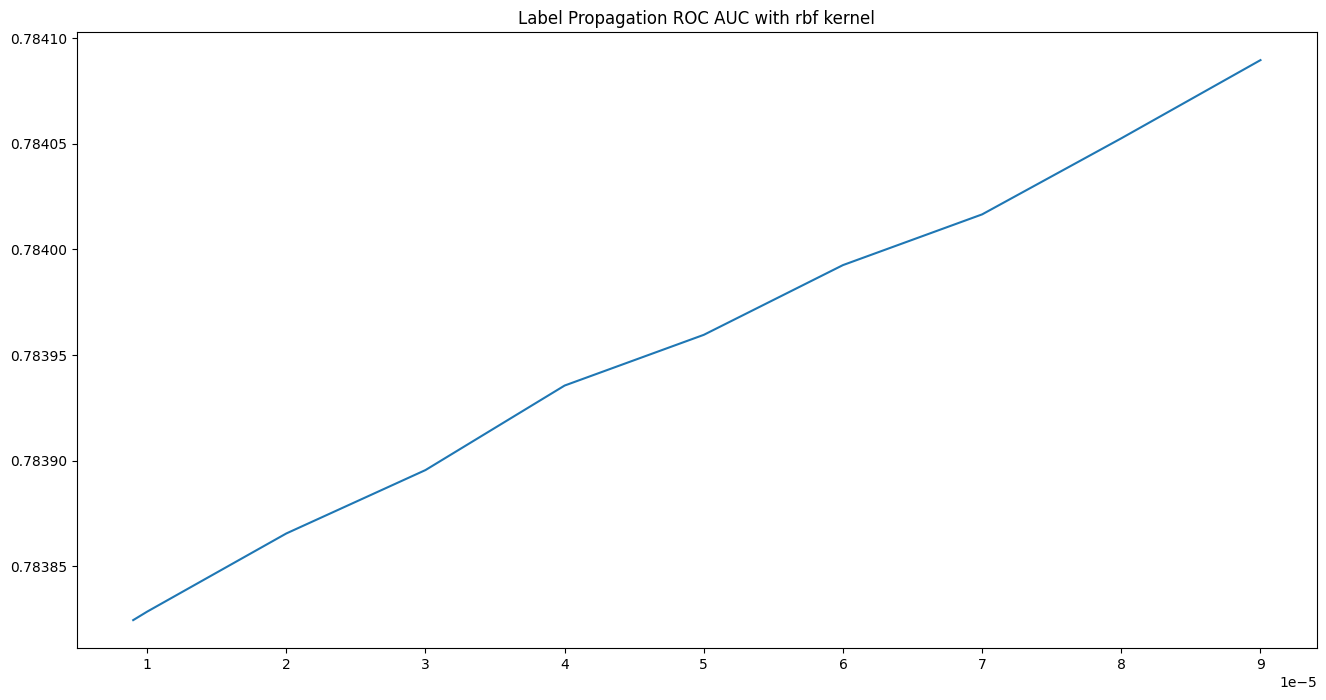

Best metrics value is at 9e-05


In [70]:
gammas = [9e-6, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5]
label_prop_test('rbf', gammas, X_1_2, X_3, y_1_2, y_3)

<Figure size 2000x1000 with 0 Axes>

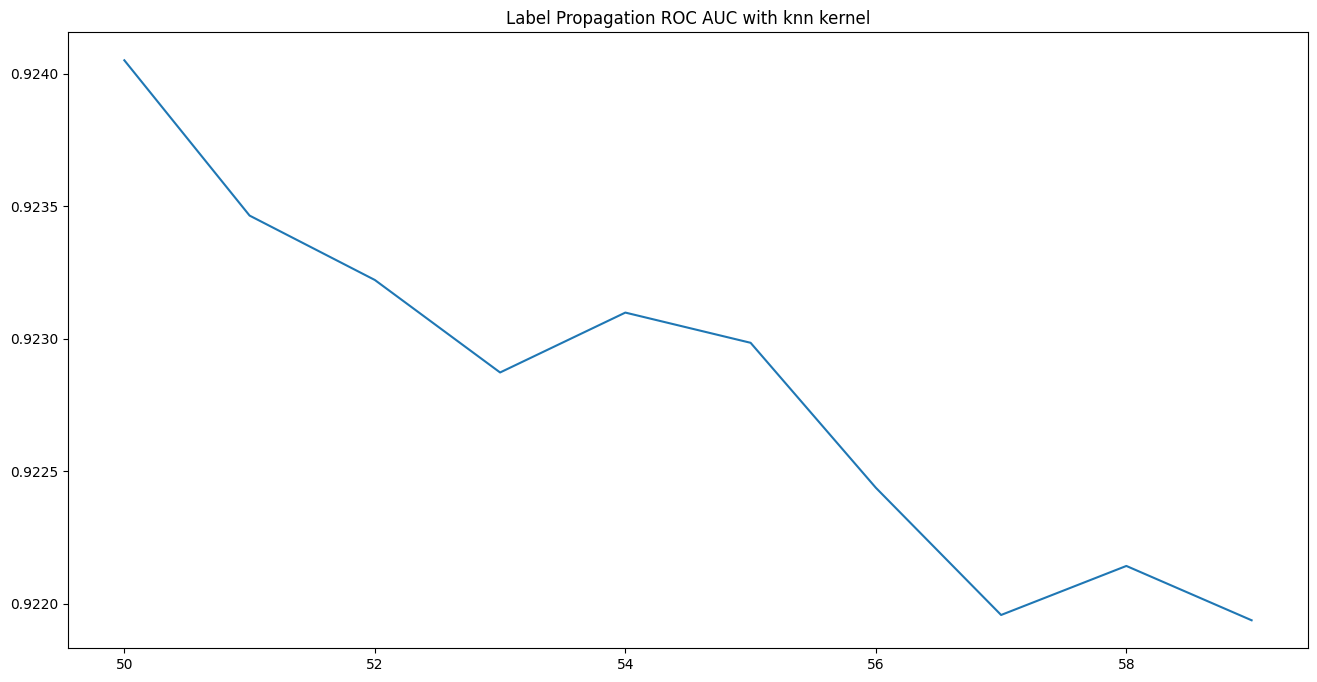

Best metrics value is at 50


In [71]:
ns = np.arange(50,60)
label_prop_test('knn', ns, X_1_2, X_3, y_1_2, y_3)

In [72]:
lp_rbf = LabelPropagation(kernel='rbf', gamma=9e-5, max_iter=100000, tol=0.0001)
lp_rbf.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Propagation RBF',
                                    roc_auc_score(y_3, lp_rbf.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

lp_knn = LabelPropagation(kernel='knn', n_neighbors=50, max_iter=100000, tol=0.0001)
lp_knn.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Propagation KNN',
                                    roc_auc_score(y_3, lp_knn.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

In [73]:
results

,Algorithm,ROC AUC
0,Logistic Regression,0.824312
1,Label Propagation RBF,0.784090
2,Label Propagation KNN,0.924050


In [74]:
%%timeit
rbf_lp_test = LabelPropagation(kernel='rbf')
rbf_lp_test.fit(df_encoded, y)
rbf_lp_test.predict_proba(df_encoded);

1.07 s ± 8.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
%%timeit
knn_lp_test = LabelPropagation(kernel='knn')
knn_lp_test.fit(df_encoded, y)
knn_lp_test.predict_proba(df_encoded);

205 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#Label Spreading (SSL Algo.)

In [76]:
def labels_spread_test(kernel, hyperparam, alphas, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 2, 0
    roc_scores = []
    if kernel == 'rbf':
        g = hyperparam
    if kernel == 'knn':
        n = hyperparam
    for alpha in alphas:
        ls = LabelSpreading(kernel=kernel, n_neighbors=n, gamma=g, alpha=alpha, max_iter=1000, tol=0.001)
        ls.fit(X_train, y_train)
        roc_scores.append(roc_auc_score(y_test, ls.predict_proba(X_test)[:,1]))
    plt.figure(figsize=(16,8));
    plt.plot(alphas, roc_scores);
    plt.title('Label Spreading ROC AUC with ' + kernel + ' kernel')
    plt.show();
    print('Best metrics value is at {}'.format(alphas[np.argmax(roc_scores)]))

<Figure size 2000x1000 with 0 Axes>

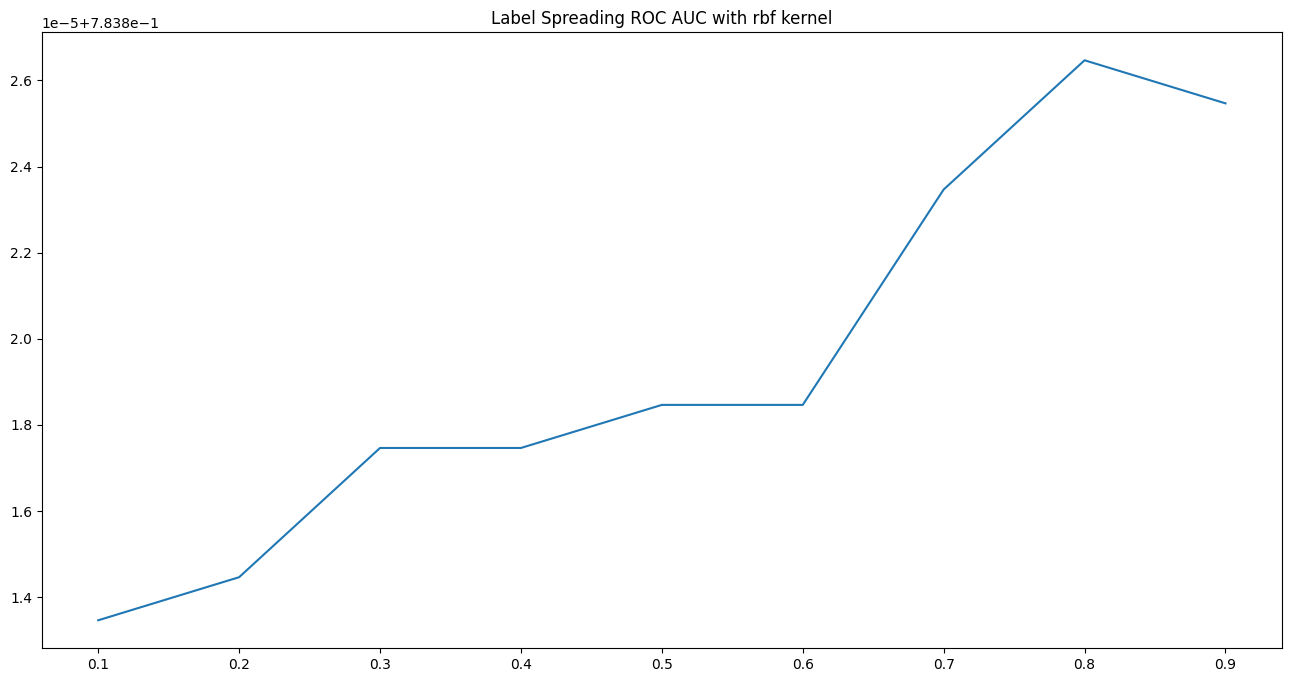

Best metrics value is at 0.8


In [77]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
labels_spread_test('rbf', 1e-5, alphas, X_1_2, X_3, y_1_2, y_3)

<Figure size 2000x1000 with 0 Axes>

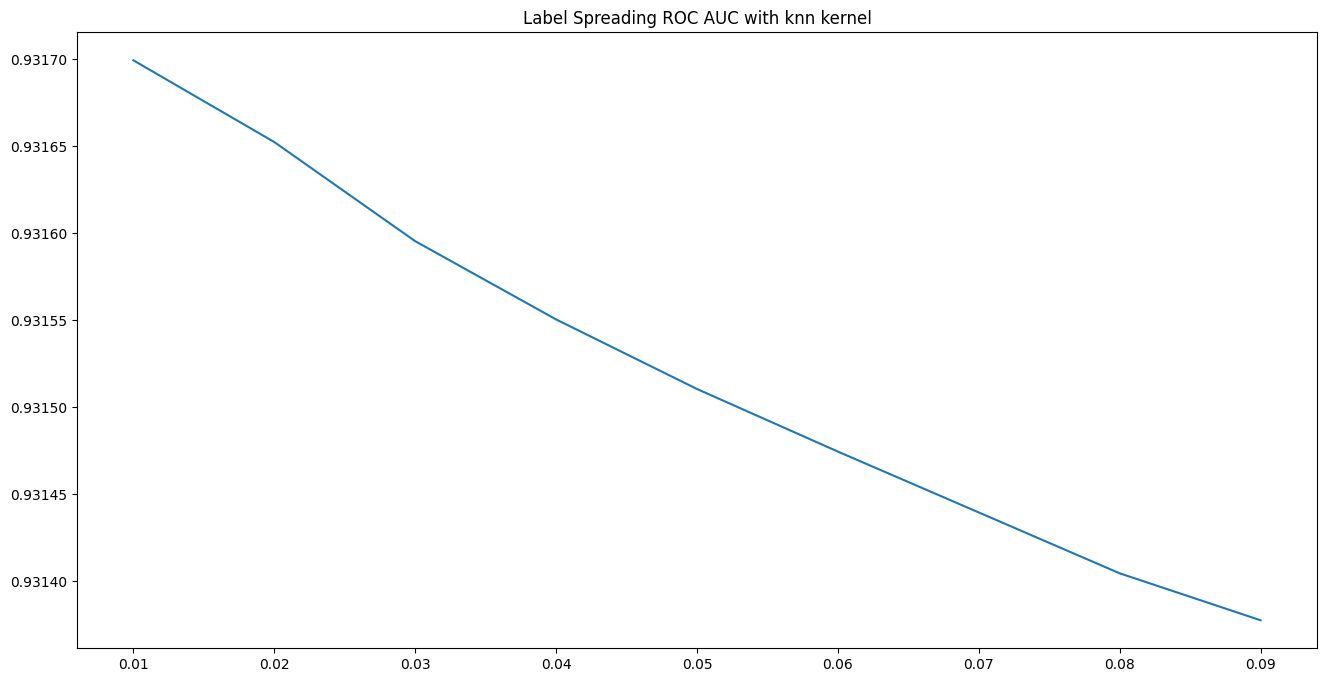

Best metrics value is at 0.01


In [78]:
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
labels_spread_test('knn', 50, alphas, X_1_2, X_3, y_1_2, y_3)

In [79]:
ls_rbf = LabelSpreading(kernel='rbf', gamma=9e-5, alpha=0.8, max_iter=1000, tol=0.001)
ls_rbf.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Spreading RBF',
                                    roc_auc_score(y_3, ls_rbf.predict_proba(X_3)[:,1])], index=index), ignore_index=True)
ls_knn = LabelSpreading(kernel='knn', n_neighbors=50, alpha=0.01, max_iter=1000, tol=0.001)
ls_knn.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Spreading KNN',
                                    roc_auc_score(y_3, ls_knn.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

In [80]:
results

,Algorithm,ROC AUC
0,Logistic Regression,0.824312
1,Label Propagation RBF,0.784090
2,Label Propagation KNN,0.924050
3,Label Spreading RBF,0.784058
4,Label Spreading KNN,0.931699


In [81]:
%%timeit
knn_ls_test = LabelSpreading(kernel='rbf')
knn_ls_test.fit(df_encoded, y)
knn_ls_test.predict_proba(df_encoded);

1.33 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
%%timeit
knn_ls_test = LabelSpreading(kernel='knn')
knn_ls_test.fit(df_encoded, y)
knn_ls_test.predict_proba(df_encoded);

217 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#Pseudo-Labelling

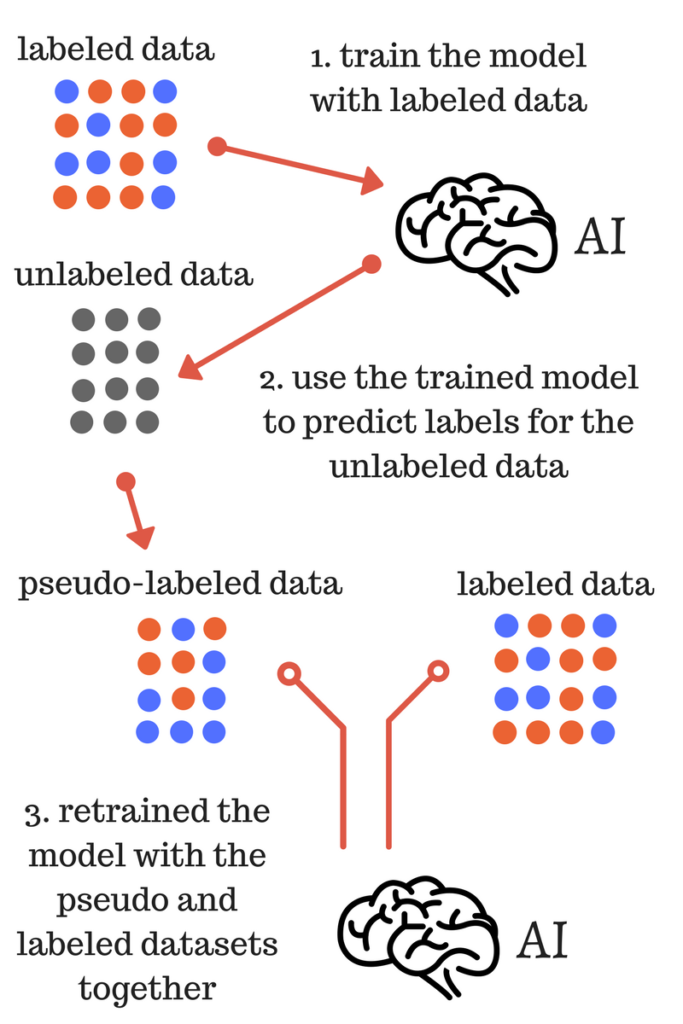

Source: https://datawhatnow.com/pseudo-labeling-semi-supervised-learning/

In [83]:
def create_augmented_train(X, y, model, test, features, target, sample_rate):
    '''
    Create and return the augmented_train set that consists
    of pseudo-labeled and labeled data.
    '''
    num_of_samples = int(len(test) * sample_rate)
    # Train the model and creat the pseudo-labeles
    model.fit(X, y)
    pseudo_labeles = model.predict(test[features])
    # Add the pseudo-labeles to the test set
    augmented_test = test.copy(deep=True)
    augmented_test[target] = pseudo_labeles
    # Take a subset of the test set with pseudo-labeles and append in onto
    # the training set
    sampled_test = augmented_test.sample(n=num_of_samples)
    temp_train = pd.concat([X, y], axis=1)
    augemented_train = pd.concat([sampled_test, temp_train])

    # Shuffle the augmented dataset and return it
    return shuffle(augemented_train)

In [103]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
class PseudoLabeler(BaseEstimator, RegressorMixin):

    def __init__(self, model, test, features, target, sample_rate=0.2, seed=42):
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed

        self.test = test
        self.features = features
        self.target = target

    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "test": self.test,
            "features": self.features,
            "target": self.target
        }
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
        if self.sample_rate > 0.0:
            augemented_train = self.__create_augmented_train(X, y)
            self.model.fit(
                augemented_train[self.features],
                augemented_train[self.target]
            )
        else:
            self.model.fit(X, y)

        return self
    def __create_augmented_train(self, X, y):
        num_of_samples = int(len(self.test) * self.sample_rate)

        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.test[self.features])

        # Add the pseudo-labels to the test set
        augmented_test = self.test.copy(deep=True)
        augmented_test[self.target] = pseudo_labels

        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_test = augmented_test.sample(n=num_of_samples)
        temp_train = pd.concat([X, y], axis=1)
        augemented_train = pd.concat([sampled_test, temp_train])
        return shuffle(augemented_train)

    def predict(self, X):
        return self.model.predict(X)

    def get_model_name(self):
        return self.model.__class__.__name__

In [88]:
train_df = df_encoded.sample(frac=0.5, random_state=42)
test_df = df_encoded.drop(train_df.index)

In [89]:
train_df.shape

(2000, 9)

In [90]:
test_df.shape

(2000, 9)

In [100]:
features = train_df.columns.tolist()
features.remove("Quality_good")
features.remove("Quality_bad")

In [101]:
features

['Size',
 'Weight',
 'Sweetness',
 'Crunchiness',
 'Juiciness',
 'Ripeness',
 'Acidity']

In [104]:
from xgboost import XGBClassifier

target = 'Quality_good'
# Preprocess the data
X_train, X_test = train_df[features], test_df[features]
y_train = train_df[target]
# Create the PseudoLabeler with XGBClassifier as the base classifer
model = PseudoLabeler(
    XGBClassifier(nthread=1),
    test_df,
    features,
    target
)
# Train the model and use it to predict
model.fit(X_train, y_train)
model.predict(X_train)

array([1, 0, 1, ..., 0, 1, 0])